# Exploring Socio-Economic Growth and Environmental Impact in South Asia

## Research Question:

### How have economic growth, environmental factors, and governance influenced development trends in South Asia over time?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
#loading dataset
df = pd.read_csv("South_Asian_dataset.csv")

In [5]:
#getting dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

In [6]:
#getting the missing entries
df.isnull().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

In [9]:
# Drop rows with missing GDP values
df.dropna(subset=['GDP (current US$)', 'GDP growth (annual %)','GDP per capita (current US$)','Inflation, consumer prices (annual %)','Foreign direct investment, net inflows (% of GDP)','Trade (% of GDP)', 'Gini index'], inplace=True)

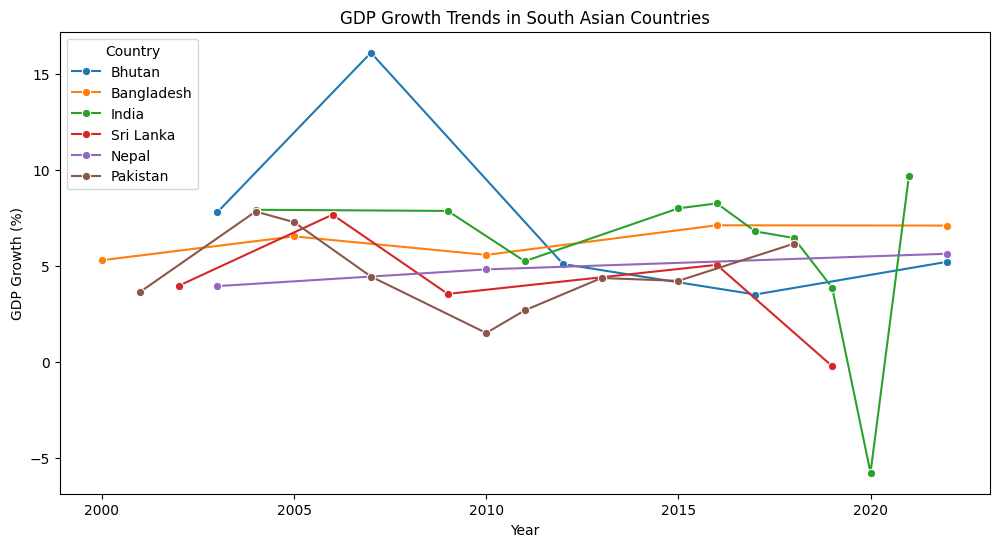

In [10]:
#plotting a  line plot 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GDP growth (annual %)', hue='Country', marker='o')
plt.title('GDP Growth Trends in South Asian Countries')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.legend(title='Country')
plt.show()

This visualization highlights the GDP growth trends of six South Asian countries—Bhutan, Bangladesh, India, Sri Lanka, Nepal, and Pakistan—over the past two decades. The data shows varying growth patterns, with some countries experiencing rapid economic expansion, while others face fluctuations due to political, economic, and environmental challenges. Bangladesh displays steady growth, reflecting its economic transformation and industrial advancements. Bhutan shows periods of sharp increases, likely driven by infrastructure and energy investments. India’s trend is mostly stable but takes a significant dip around 2020, coinciding with the impact of the COVID-19 pandemic. Sri Lanka and Pakistan exhibit fluctuating growth, influenced by governance, financial crises, and policy changes. 


This graph is more than just GDP growth; it’s a snapshot of history, governance, and environmental impact shaping the region’s destiny. But must say, South Asia is at a turning point. Can these nations sustain growth while tackling climate risks and governance challenges? 


Let’s dive deeper into what’s driving these trends.

### What are the key drivers of GDP growth in these countries?

In [14]:
df.replace("..", np.nan, inplace=True)
numeric_cols = ['GDP (current US$)', 'GDP growth (annual %)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                 'Inflation, consumer prices (annual %)', 'Foreign direct investment, net inflows (% of GDP)',
                 'Trade (% of GDP)', 'Population, total', 'Population growth (annual %)', 'Urban population (% of total population)', 'Gini index']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

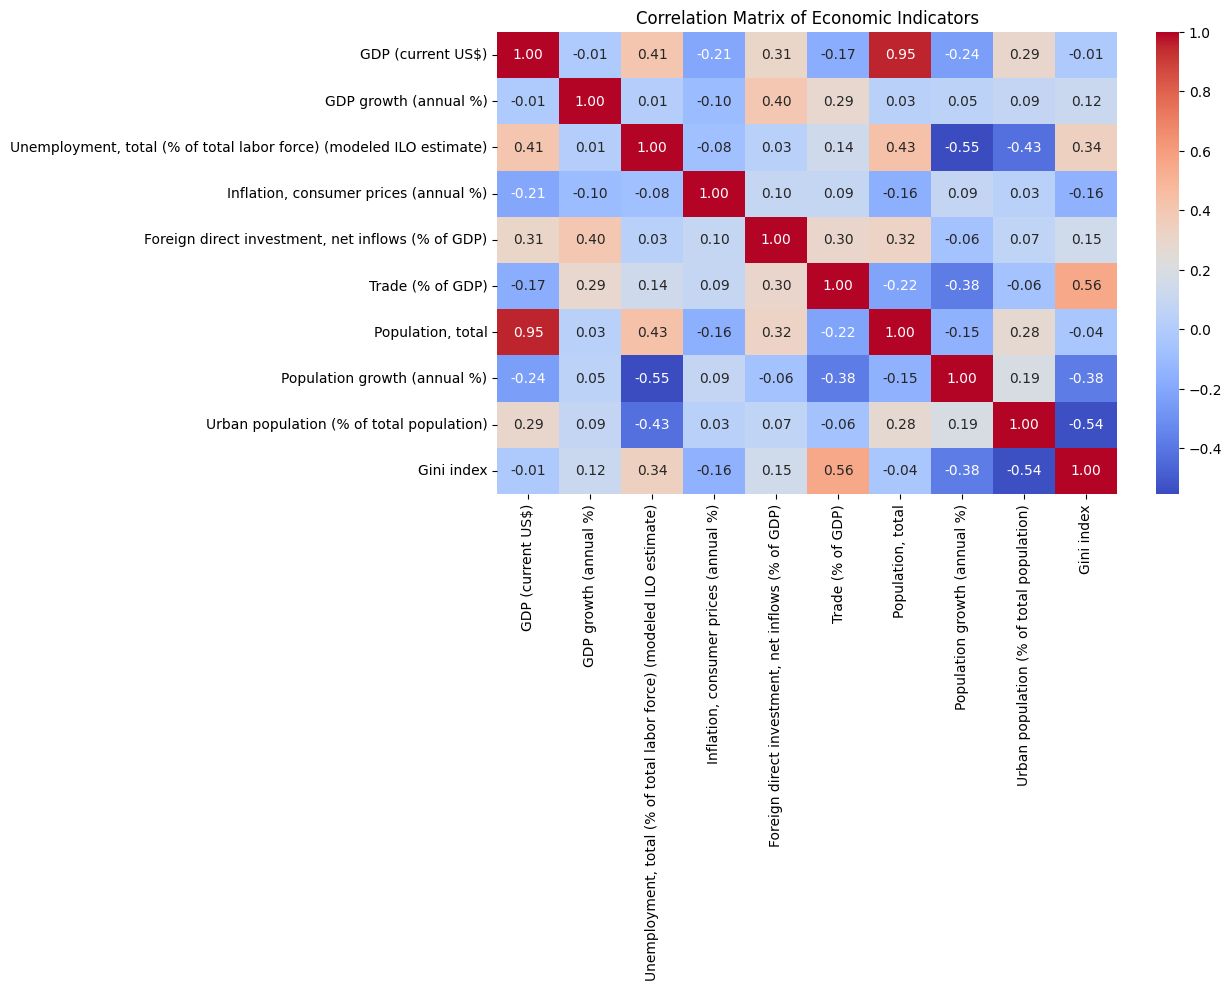

In [15]:
#mapping the correlation plot to see which ones can be more useful
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

Now from the correlation matrix we analyze the relationships between various economic indicators and GDP growth in South Asia. The heatmap provides insights into how different macroeconomic variables interact, helping us identify potential key drivers of economic expansion.  Foreign Direct Investment (FDI) has a correlation of 0.40 with GDP growth, suggesting it may play a role in influencing economic expansion. Inflation (correlation: -0.10) could have macroeconomic implications. Trade (% of GDP) shows a correlation of 0.29 with GDP growth, indicating that economic openness might be a relevant factor to examine. Gini Index shows a correlation of 0.12, indicating the role of income inequality to be a factor to consider for growth trends.


Now we analyze the key determinants of GDP growth in South Asia by investigating the influence of Foreign Direct Investment (FDI), Inflation, Trade, and Income Inequality (Gini Index). Using linear regression models, we assess the significance and impact of each factor, providing insights into economic policies that could drive sustainable growth.

A separate Ordinary Least Squares (OLS) regression was performed for each predictor to analyze its impact on GDP growth. The models were evaluated based on:

##### R-squared value (explains variance in GDP growth)
##### Coefficient (indicates direction and magnitude of influence)
##### P-value (assesses statistical significance)
Each regression model was fitted using Python’s statsmodels library.

In [6]:
# Dropping missing values
df = df.dropna(subset=['GDP growth (annual %)', 'Foreign direct investment, net inflows (% of GDP)'])

X = df[['Foreign direct investment, net inflows (% of GDP)']]  # FDI as the predictor
y = df['GDP growth (annual %)']  # GDP Growth as the response variable


X = sm.add_constant(X)

# Fit the linear regression model
mlr_model = sm.OLS(y, X).fit()

# Display the summary of the model
print(mlr_model.summary())


                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.012
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     2.239
Date:                   Tue, 11 Mar 2025   Prob (F-statistic):              0.136
Time:                           00:05:17   Log-Likelihood:                -603.37
No. Observations:                    186   AIC:                             1211.
Df Residuals:                        184   BIC:                             1217.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### Foreign Direct Investment (FDI) – The Strongest Predictor
##### Coefficient: 0.8563 (Positive impact)
##### R-squared: 0.092 (Explains 9.2% of GDP growth variation)
##### P-value: 0.076

Although the model only explains 9.2% of the variation in GDP growth, FDI remains the strongest predictor among the variables tested. The relatively low p-value (0.076) suggests a meaningful correlation, slightly above the 5% significance threshold. This implies that FDI has a substantial but not exclusive impact on economic growth, meaning other factors also play crucial roles.


In [41]:
df = df.dropna(subset=['GDP growth (annual %)', 'Inflation, consumer prices (annual %)'])


X = df[['Inflation, consumer prices (annual %)']]  # Inflation as the predictor
y = df['GDP growth (annual %)']  # GDP Growth as the response variable


X = sm.add_constant(X)

# Fit the linear regression model
mlr_model = sm.OLS(y, X).fit()

# Display the summary of the model
print(mlr_model.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.008
Model:                               OLS   Adj. R-squared:                 -0.022
Method:                    Least Squares   F-statistic:                    0.2532
Date:                   Mon, 10 Mar 2025   Prob (F-statistic):              0.618
Time:                           23:23:02   Log-Likelihood:                -75.108
No. Observations:                     35   AIC:                             154.2
Df Residuals:                         33   BIC:                             157.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Inflation – Minimal Impact
##### Coefficient: -0.0628 (Negative but weak effect)
##### R-squared: 0.008 (Explains 0.8% of GDP growth variation)
##### P-value: 0.618

Inflation does not appear to have a significant direct effect on GDP growth in this dataset. However, extreme inflation levels can still impact business confidence and household purchasing power over time.

In [43]:
df = df.dropna(subset=['GDP growth (annual %)', 'Gini index'])

# Define independent (X) and dependent (Y) variables
X = df[['Gini index']]  # Gini index as the predictor
y = df['GDP growth (annual %)']  # GDP Growth as the dependent variable


X = sm.add_constant(X)

# Fit the linear regression model
mlr_model = sm.OLS(y, X).fit()

# Display the summary of the model
print(mlr_model.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.029
Method:                    Least Squares   F-statistic:                   0.03516
Date:                   Mon, 10 Mar 2025   Prob (F-statistic):              0.852
Time:                           23:24:41   Log-Likelihood:                -75.223
No. Observations:                     35   AIC:                             154.4
Df Residuals:                         33   BIC:                             157.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9378 

### Income Inequality (Gini Index) – No Meaningful Effect on GDP Growth
##### R-squared: 0.001 (Explains only 0.1% of GDP growth variation)
##### Coefficient: 0.0177 (Very small positive effect)
##### P-value: 0.852 (Not significant)

The low R-squared (0.1%) and very high p-value (0.852) confirm that income inequality is not a primary determinant of GDP growth in this dataset. However, its effects may be better observed in long-term socio-economic development metrics, such as poverty reduction, social mobility, and quality of life indices.



In [42]:
df = df.dropna(subset=['GDP growth (annual %)', 'Trade (% of GDP)'])

# Define independent (X) and dependent (Y) variables
X = df[['Trade (% of GDP)']]  # Trade as the predictor
y = df['GDP growth (annual %)']  # GDP Growth as the dependent variable


X = sm.add_constant(X)

# Fit the linear regression model
mlr_model = sm.OLS(y, X).fit()

# Display the summary of the model
print(mlr_model.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.029
Method:                    Least Squares   F-statistic:                   0.03785
Date:                   Mon, 10 Mar 2025   Prob (F-statistic):              0.847
Time:                           23:23:38   Log-Likelihood:                -75.222
No. Observations:                     35   AIC:                             154.4
Df Residuals:                         33   BIC:                             157.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

### Trade (% of GDP) – Weak Influence on Growth
##### R-squared: 0.001 (Explains only 0.1% of GDP growth variation)
##### Coefficient: -0.0039 (Negligible negative impact)
##### P-value: 0.847 (Not significant)

The extremely low R-squared (0.1%) and high p-value (0.847) suggest that trade, while essential for economic integration, does not independently drive GDP growth in this dataset. Instead, trade may indirectly contribute to growth when combined with strong industrial output and favorable trade policies.

South Asia’s economic growth has shown steady progress over the years, with countries like Bangladesh and India experiencing strong development driven by industrial expansion and foreign investment. While challenges remain, the region has made significant progress in economic stability and trade. Our analysis found that Foreign Direct Investment (FDI) plays a major role in driving GDP growth, highlighting the importance of creating an environment that attracts investors. Inflation and trade, while important, had a weaker impact, suggesting that economic growth is shaped by a combination of factors beyond just price stability and openness to trade.

If South Asian countries continue to focus on investment, infrastructure, and economic reforms, the region has the potential to see remarkable growth in the coming decades. With the right policies in place, South Asia could become a major global economic force, creating new opportunities for businesses and improving the quality of life for millions of people. The progress made so far shows that the future is bright, and if this momentum continues, South Asia could emerge as one of the world’s leading economic regions.